In [36]:
import numpy as np
import pandas as pd
import sys
import os
import itk
code = os.path.abspath('../')
sys.path.append(code)
import src
from src.DELAT_utils import collect_region_stats_paths
import matplotlib.pyplot as plt
from src.analysis import *
from sklearn.linear_model import LinearRegression
from tifffile import imread, imwrite
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy.stats import linregress
import datetime


In [16]:
base_path = '/nrs/spruston/Boaz/I2'
base_path = r'X:\Boaz\I2'
meta = pd.read_excel(os.path.join(code, 'paramaters','metadata.xlsx'), 'Metadata', index_col=0)
csv_paths = collect_region_stats_paths(base_path)
region_data = load_region_data(csv_paths)
slope = 1.4247
intercept = 202.8271
meta

Data Validation extension is not supported and will be removed


,Cage,AnimalID,Genotype,Pulse,Chase,sex,DOB,Perfusion,Path,Age,Interval,Group,Comment
Number,,,,,,,,,,,,,
1,215258,549057,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-03,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,6.400000,0,Zero,Zero day iDISCO
2,216141,550749,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO
3,216141,550751,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO
4,216314,551089,GluA2-HaloTag line1,Skipped,JFX673,female,2024-04-02,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.400000,0,Zero,Zero day iDISCO
5,218600,555600,PSD95-HaloTag,JFX673,JF552,male,2024-06-03,2024-08-28,/nrs/spruston/Boaz/I2/2024-09-09_Compare_iDISC...,2.866667,2,Control,"Problem with Pulse, test for iDISCO"
6,215695,549895,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-15,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,6.000000,0,Zero,Zero day iDISCO
7,216141,550750,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,5.566667,0,Zero,Zero day iDISCO
8,216798,552102,GluA2-HaloTag line1,Skipped,JF552,female,2024-04-17,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.900000,0,Zero,Zero day iDISCO
9,219292,550746,GluA2-HaloTag line1,JFX673,JF552,female,2024-03-28,2024-08-23,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.933333,3,Reversal,BM24


In [17]:
csv_paths

{'555600': 'X:\\Boaz\\I2\\2024-09-09_Compare_iDISCO_EZCleat_THF\\ANM555600_PSD-HT_iDISCO\\itk\\region_stats.csv',
 '549057': 'X:\\Boaz\\I2\\2024-09-19_iDISCO_CalibrationBrains\\ANM549057_left_JF552\\itk\\region_stats.csv',
 '550749': 'X:\\Boaz\\I2\\2024-09-19_iDISCO_CalibrationBrains\\ANM550749_left_JF552\\itk\\region_stats.csv',
 '550751': 'X:\\Boaz\\I2\\2024-09-19_iDISCO_CalibrationBrains\\ANM550751_left_JF673\\itk\\region_stats.csv',
 '551089': 'X:\\Boaz\\I2\\2024-09-19_iDISCO_CalibrationBrains\\ANM551089_left_JF673\\itk\\region_stats.csv',
 '549895': 'X:\\Boaz\\I2\\20240930_iDISCO_round2\\ANM549895_JFX673\\itk\\region_stats.csv',
 '550746': 'X:\\Boaz\\I2\\20240930_iDISCO_round2\\ANM550746_BM24\\itk\\region_stats.csv',
 '550748': 'X:\\Boaz\\I2\\20240930_iDISCO_round2\\ANM550748_BM26\\itk\\region_stats.csv',
 '550750': 'X:\\Boaz\\I2\\20240930_iDISCO_round2\\ANM550750_JF552\\itk\\region_stats.csv',
 '552100': 'X:\\Boaz\\I2\\20240930_iDISCO_round2\\ANM552100_JFX673\\itk\\region_stats.c

In [18]:

filtered_meta = meta[(meta['Group'] == 'MouseCity') & (meta['Path'].str.startswith('/nrs/'))]
filtered_meta

,Cage,AnimalID,Genotype,Pulse,Chase,sex,DOB,Perfusion,Path,Age,Interval,Group,Comment
Number,,,,,,,,,,,,,
16,220742,550437,PSD95-HaloTag,JFX673,JF552,male,2024-03-26,2024-09-19,/nrs/spruston/Boaz/I2/202410_iDisco_Run3_mouse...,5.900000,8,MouseCity,MC2_A
17,220742,550438,PSD95-HaloTag,JFX673,JF552,male,2024-03-26,2024-09-19,/nrs/spruston/Boaz/I2/202410_iDisco_Run3_mouse...,5.900000,8,MouseCity,MC2_B
18,220742,550439,PSD95-HaloTag,JFX673,JF552,male,2024-03-26,2024-09-19,/nrs/spruston/Boaz/I2/202410_iDisco_Run3_mouse...,5.900000,8,MouseCity,MC2_C
19,220743,551775,PSD95-HaloTag,JFX673,JF552,male,2024-04-11,2024-09-19,/nrs/spruston/Boaz/I2/202410_iDisco_Run3_mouse...,5.366667,8,MouseCity,MC2_D
20,220743,551776,PSD95-HaloTag,JFX673,JF552,male,2024-04-11,2024-09-19,/nrs/spruston/Boaz/I2/202410_iDisco_Run3_mouse...,5.366667,8,MouseCity,MC2_E
21,220743,551777,PSD95-HaloTag,JFX673,JF552,male,2024-04-11,2024-09-19,/nrs/spruston/Boaz/I2/202410_iDisco_Run3_mouse...,5.366667,8,MouseCity,MC2_F


In [20]:
columns = ['Region', 'mean_ch1', 'mean_ch2']
filters = {
    'Group': ['MouseCity'],  # Include only animals from the 'Zero' group
}
meta_columns = ['AnimalID']
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
mice = unified_df.pivot(index='Region', columns='AnimalID', values=['mean_ch1', 'mean_ch2'])
mice

mean_ch1                                                      \
AnimalID        550437       550438       550439       551775       551776   
Region                                                                       
1          3398.931054  3703.691704  3322.577462  3838.510844  3373.242279   
2          4036.450890  5505.327954  4955.473349  5006.384022  5406.020113   
6          2206.209673  2205.200012  2137.921125  2077.679501  1941.313986   
7          2019.373170  2393.431341  2160.973904  2350.373904  2052.191746   
9          8480.375662  7987.394786  7780.217916  7330.147648  7789.572257   
...                ...          ...          ...          ...          ...   
607344850  4199.757861  4437.218711  4427.554592  4468.493360  4192.809540   
607344854  3837.427635  4073.009019  3971.951757  4027.123388  3729.808338   
607344858  3967.156092  4321.531250  4056.700501  4053.113291  3765.914320   
607344862  3712.519136  3896.002307  3639.047185  3546.687113  3529.688896   
614454277  3837.949492  3936.607119  3920.413018  3824.625950  3739.300698   

                           mean_ch2                                         \
AnimalID        551777       550437       550438       550439       551775   
Region                                                                       
1          3750.861214  1274.553387  1474.149213  1229.764341  1342.173713   
2          6117.666392  1078.127575  1627.166506  1443.996394  1326.878901   
6          2167.955015   757.096564   840.269670   798.063782   739.596187   
7          2507.964411   698.537771   822.861123   734.035746   742.347457   
9          7979.552128  1973.722652  2456.465982  2291.942792  2080.272127   
...                ...          ...          ...          ...          ...   
607344850  4430.387152  1181.807630  1254.349599  1158.303683  1131.355988   
607344854  4272.230834  1037.468327  1083.051914   982.751494   999.617619   
607344858  4094.146097  1166.131988  1265.662526  1104.268012  1083.382911   
607344862  3653.357712   949.559348   996.086505   865.760512   862.616913   
614454277  4214.652736  1372.038635  1407.557205  1292.430519  1233.485824   

                                     
AnimalID        551776       551777  
Region                               
1          1280.417515  1213.844300  
2          1461.220316  1440.691792  
6           733.337687   712.755594  
7           694.420892   761.707262  
9          2318.015354  1941.430903  
...                ...          ...  
607344850  1094.783951  1025.858713  
607344854   953.459832   950.026324  
607344858  1044.267062  1010.460997  
607344862   858.148841   803.231519  
614454277  1221.371319  1211.581283  

[687 rows x 12 columns]

In [21]:
Chase = mice['mean_ch1'] 

In [22]:

Pulse =mice['mean_ch2'] * slope + intercept

In [23]:
Chase

AnimalID,550437,550438,550439,551775,551776,551777
Region,,,,,,
1,3398.931054,3703.691704,3322.577462,3838.510844,3373.242279,3750.861214
2,4036.450890,5505.327954,4955.473349,5006.384022,5406.020113,6117.666392
6,2206.209673,2205.200012,2137.921125,2077.679501,1941.313986,2167.955015
7,2019.373170,2393.431341,2160.973904,2350.373904,2052.191746,2507.964411
9,8480.375662,7987.394786,7780.217916,7330.147648,7789.572257,7979.552128
...,...,...,...,...,...,...
607344850,4199.757861,4437.218711,4427.554592,4468.493360,4192.809540,4430.387152
607344854,3837.427635,4073.009019,3971.951757,4027.123388,3729.808338,4272.230834
607344858,3967.156092,4321.531250,4056.700501,4053.113291,3765.914320,4094.146097


In [24]:
Pulse

AnimalID,550437,550438,550439,551775,551776,551777
Region,,,,,,
1,2018.683310,2303.047484,1954.872356,2115.021989,2027.037933,1932.191074
2,1738.835457,2521.051221,2260.088763,2093.231471,2284.627684,2255.380696
6,1281.462575,1399.959299,1339.828570,1256.529787,1247.613303,1218.289995
7,1198.033863,1375.157343,1248.607828,1260.449522,1192.168544,1288.031437
9,3014.789762,3702.554185,3468.157996,3166.590799,3505.303575,2968.783708
...,...,...,...,...,...,...
607344850,1886.548430,1989.898974,1853.062358,1814.669977,1762.565796,1664.368009
607344854,1680.908226,1745.851162,1602.953154,1626.982322,1561.221323,1556.329604
607344858,1864.215344,2006.016501,1776.077736,1746.322734,1690.594384,1642.430882


In [25]:
Fraction_Pulse = Pulse/(Chase+Pulse)

In [26]:
Fraction_Pulse

AnimalID,550437,550438,550439,551775,551776,551777
Region,,,,,,
1,0.372615,0.383411,0.370420,0.355255,0.375358,0.339992
2,0.301082,0.314096,0.313224,0.294837,0.297066,0.269362
6,0.367426,0.388321,0.385257,0.376860,0.391233,0.359776
7,0.372360,0.364900,0.366206,0.349075,0.367459,0.339313
9,0.262266,0.316730,0.308325,0.301674,0.310345,0.271163
...,...,...,...,...,...,...
607344850,0.309966,0.309610,0.295045,0.288815,0.295962,0.273082
607344854,0.304604,0.300033,0.287530,0.287752,0.295069,0.267018
607344858,0.319687,0.317029,0.304499,0.301119,0.309831,0.286309


In [33]:
Lifetime = -9/np.log(Fraction_Pulse)

In [34]:
Lifetime

AnimalID,550437,550438,550439,551775,551776,551777
Region,,,,,,
1,9.116600,9.388214,9.062366,8.696328,9.184843,8.342341
2,7.497674,7.771635,7.753033,7.369006,7.414719,6.861330
6,8.988921,9.514519,9.435507,9.222429,9.590259,8.803907
7,9.110289,8.927399,8.959142,8.551334,8.989714,8.326920
9,6.724465,7.828085,7.649158,7.509957,7.691834,6.896366
...,...,...,...,...,...,...
607344850,7.683820,7.676284,7.373250,7.246552,7.392054,6.933834
607344854,7.571028,7.475939,7.220636,7.225115,7.373758,6.815911
607344858,7.891885,7.834522,7.568838,7.498448,7.680957,7.196055


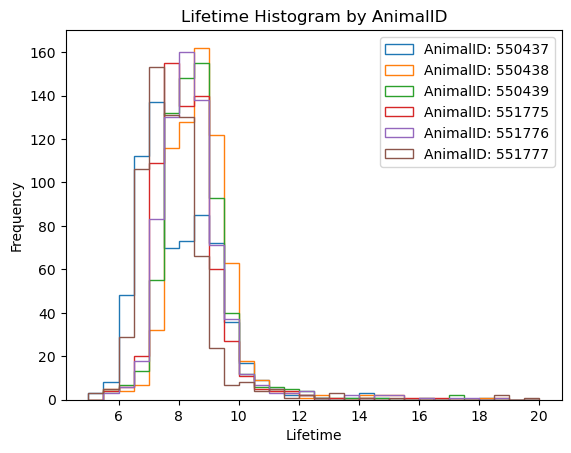

In [37]:


# Assuming Lifetime is your DataFrame
bins=np.arange(5, 20.5, 0.5)
for animal_id in Lifetime.columns:
    plt.hist(Lifetime[animal_id].dropna(), bins=bins   , alpha=1, label=f'AnimalID: {animal_id}', histtype='step')
    

plt.legend()
plt.xlabel('Lifetime')
plt.ylabel('Frequency')
plt.title('Lifetime Histogram by AnimalID')
plt.show()

In [40]:
melted_df

NameError: name 'melted_df' is not defined

In [43]:
Lifetime.reset_index(inplace=True)

# Melt the DataFrame to long format
melted_df = Lifetime.melt(id_vars=['Region'], var_name='AnimalID', value_name='Lifetime')
stats_by_animal = melted_df.groupby('AnimalID')['Lifetime'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])


In [44]:
stats_by_animal

,mean,median,std,min,max,count
AnimalID,,,,,,
550437,8.021524,7.751824,1.421412,5.271895,18.058869,687
550438,8.787397,8.625343,1.424983,5.546616,23.824024,687
550439,8.545177,8.460117,1.146618,5.507625,17.323188,687
551775,8.312736,8.177133,1.195417,5.561437,23.093509,687
551776,8.500775,8.308147,1.448060,5.571580,25.095761,687
551777,7.967992,7.696693,2.014944,5.270944,36.412108,687
index,343.000000,343.000000,198.464103,0.000000,686.000000,687
